# KMeans clustering

### Import necessary package

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
# use widget instead of inline to make plot interactive
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/ht_grouped_feature_engineered.csv',index_col='device_id')
df.head()

,resting_heartrate_avg,resting_heartrate_min,resting_heartrate_max,active_heartrate_avg,active_heartrate_min,active_heartrate_max,bmi_avg,bmi_min,bmi_max,vo2_avg,vo2_min,vo2_max,workout_minutes_avg,workout_minutes_min,workout_minutes_max,steps_avg,steps_min,steps_max,lifestyle,bmi_change
device_id,,,,,,,,,,,,,,,,,,,,
0003a6b8-e48b-11ea-8204-0242ac110002,82.683797,60.677755,100.121903,139.434875,120.307791,162.347827,22.398064,19.530816,24.997081,20.994012,20.283341,21.491176,5.502632,1.046930,9.325750,5171.495890,2539,7837,Sedentary,5.466266
0007a88a-e48b-11ea-8204-0242ac110002,77.732942,52.712876,97.937731,127.057153,109.049387,146.869868,25.150813,22.635269,27.933614,25.527475,24.929151,26.231702,37.216702,12.109056,66.115919,7115.591781,3731,10189,Weight Trainer,5.298346
000b9c56-e48b-11ea-8204-0242ac110002,86.511629,63.903506,104.437895,147.315731,129.551728,177.783150,19.148256,16.844741,21.339665,19.448407,18.817131,19.946847,45.000087,10.524606,84.725056,7257.693151,4223,11156,Weight Trainer,4.494924
000f916c-e48b-11ea-8204-0242ac110002,77.550541,58.418806,98.875329,129.577004,110.845517,146.738650,24.240376,21.335820,26.909150,21.401302,20.705860,22.088526,37.886069,11.402530,68.119525,7129.690411,4413,10563,Weight Trainer,5.573329
00176e5a-e48b-11ea-8204-0242ac110002,69.312448,47.355699,92.762496,167.185850,147.876166,186.283615,27.132669,23.589288,31.026467,30.939205,30.032978,32.026828,5.119427,0.856124,9.947677,5128.024658,2938,7310,Sedentary,7.437179


In [4]:
# we will use a subset of the columns 
interested_cols = ['resting_heartrate_avg', 'active_heartrate_avg', 'bmi_avg', 'vo2_avg', 'workout_minutes_avg', 'steps_max']
df_k = df[interested_cols]

In [5]:
distorsions = []
values_of_k = range(2,10)

In [6]:
for k in values_of_k:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(scale(df_k))
    distorsion = k_means.score(scale(df_k))
    distorsions.append(-distorsion)

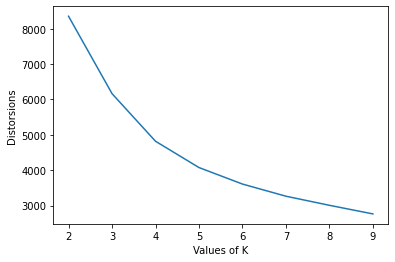

In [7]:
fig = plt.figure()

plt.plot(list(values_of_k),distorsions)
plt.xlabel('Values of K')
plt.ylabel('Distorsions')
plt.show()

The Elbow (breaking point) seems to be around 4 or 5. This should be our optimum number of clusters

### Splitting the data

In [8]:
train_df, inference_df = train_test_split(df_k, train_size=0.9, test_size=0.1, random_state=42)
train_df.shape

(2466, 6)

In [9]:
model = KMeans(n_clusters=4, random_state=42) 
model.fit(scale(train_df))

KMeans(n_clusters=4, random_state=42)

In [10]:
model.cluster_centers_

array([[-0.81944708, -0.83767397, -0.66461011,  0.83095443,  0.41536539,
         0.86058361],
       [ 1.46003975,  1.06970722,  0.02683551, -1.32987413,  0.34584581,
        -1.00874487],
       [-0.03852087,  0.17950084,  0.96576905, -0.09645165,  0.02954085,
        -0.21871747],
       [ 1.34537253,  1.43086145,  0.16019459, -1.22750788, -2.38211119,
        -1.51559344]])

In [11]:
inference_df_clusters = model.predict(scale(inference_df))
inference_df['label'] = inference_df_clusters

<ipython-input-11-caf2d8d11502>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inference_df['label'] = inference_df_clusters


In [12]:
pca = PCA(n_components=3)
components = pca.fit_transform(scale(inference_df))

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}



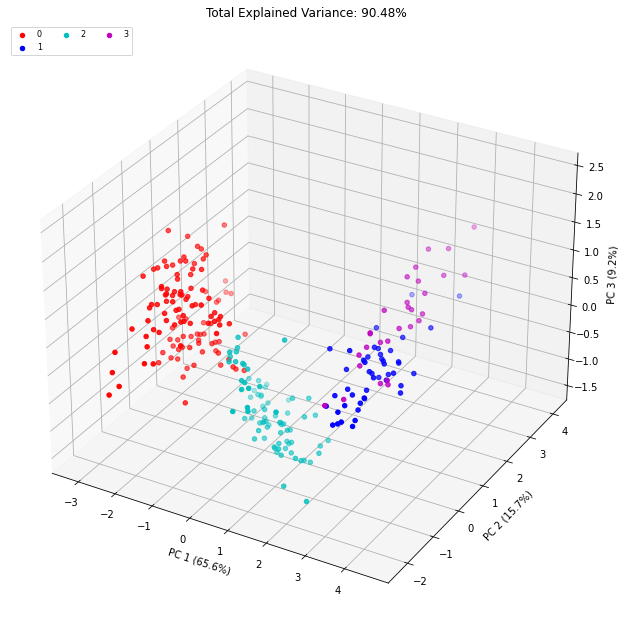

In [13]:
scatter_df = pd.concat([pd.DataFrame(inference_df.label).reset_index(drop=True),
          pd.DataFrame(components,columns=['x','y','z'])],
         axis=1)

Sedentary = scatter_df.loc[scatter_df.label == 0]
Trainer = scatter_df.loc[scatter_df.label == 1]
Athlete = scatter_df.loc[scatter_df.label == 2]
Cardio = scatter_df.loc[scatter_df.label == 3]

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(projection='3d')

plt.title(f'Total Explained Variance: {total_var:.2f}%')

df_list =    [Sedentary,Trainer,Athlete,Cardio]
color_list = ['r','b','c','m']
label_list = ['0','1','2','3']

for _, (df_c, color,lbl) in enumerate(zip(df_list, color_list, label_list)):
    ax.scatter(df_c.x,df_c.y,df_c.z,color=color, label=lbl)

ax.set_xlabel(labels['0'])
ax.set_ylabel(labels['1'])
ax.set_zlabel(labels['2'])
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8,)

plt.show()